
Name: Jay Goyal

Experiment: 4

Roll No: C017

Btech EXTC

Third Year

Semester 6

In [ ]:
#Bias and Variance and Regularization

#Importing the dataset from Keras
from keras.datasets import imdb

In [ ]:
#loading the the data into train and test
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
len(train_data[0])

218

In [ ]:
len(test_data[0])

68

In [ ]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
len(train_data[5])

43

In [ ]:
import numpy as np
#Preparing the dataset
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results


In [ ]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [ ]:
X_train.shape

(25000, 10000)

In [ ]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train[0]

1.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

In [ ]:
#defining the deep neural network
model = Sequential()
model.add(layers.Dense(16, activation ='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation ='relu'))
model.add(layers.Dense(1, activation ='sigmoid'))

In [ ]:
#compiling the model
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer = optimizers.RMSprop(lr=0.001),loss = losses.binary_crossentropy, metrics = [metrics.binary_accuracy] ) 

In [ ]:
# Dividing the train data intotrain and validate
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
X_val.shape
partial_X_train.shape

(15000, 10000)

In [ ]:
#fit the model
history = model.fit(partial_X_train,partial_y_train, epochs = 20, batch_size = 512, validation_data = (X_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5947 - binary_accuracy: 0.6986 - val_loss: 0.4019 - val_binary_accuracy: 0.8648
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3343 - binary_accuracy: 0.9024 - val_loss: 0.3100 - val_binary_accuracy: 0.8878
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2331 - binary_accuracy: 0.9294 - val_loss: 0.2816 - val_binary_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1780 - binary_accuracy: 0.9453 - val_loss: 0.2739 - val_binary_accuracy: 0.8912
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1465 - binary_accuracy: 0.9555 - val_loss: 0.2755 - val_binary_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1156 - binary_accuracy: 0.9685 - val_loss: 0.2873 - val_binary_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - los

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

Text(0, 0.5, 'Loss')

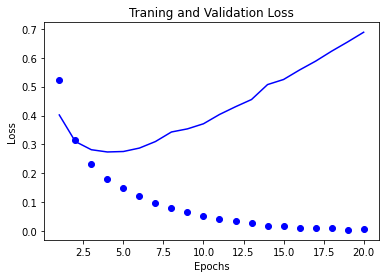

In [ ]:
#plotting the training and validation loss
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Traning and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

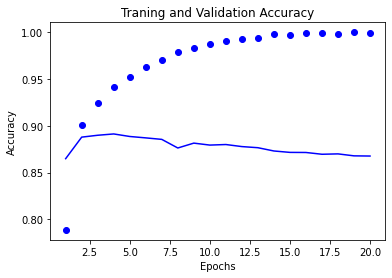

In [ ]:
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Traning and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
from keras import regularizers

model_1 = Sequential()
model_1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001),activation ='relu', input_shape = (10000,)))
model_1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation ='relu'))
model_1.add(layers.Dense(1, activation ='sigmoid'))

In [ ]:
#compiling the model
model_1.compile(optimizer = optimizers.RMSprop(lr=0.001),loss = losses.binary_crossentropy, metrics = [metrics.binary_accuracy] ) 

In [ ]:
#fit the model
history_1 = model_1.fit(partial_X_train,partial_y_train, epochs = 20, batch_size = 512, validation_data = (X_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.6231 - binary_accuracy: 0.7152 - val_loss: 0.4201 - val_binary_accuracy: 0.8744
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3669 - binary_accuracy: 0.9007 - val_loss: 0.3527 - val_binary_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2908 - binary_accuracy: 0.9231 - val_loss: 0.3496 - val_binary_accuracy: 0.8794
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2477 - binary_accuracy: 0.9371 - val_loss: 0.3273 - val_binary_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2306 - binary_accuracy: 0.9430 - val_loss: 0.3296 - val_binary_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2077 - binary_accuracy: 0.9511 - val_loss: 0.3378 - val_binary_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - los

In [ ]:
history_1_dict = history_1.history
history_1_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

Text(0, 0.5, 'Loss')

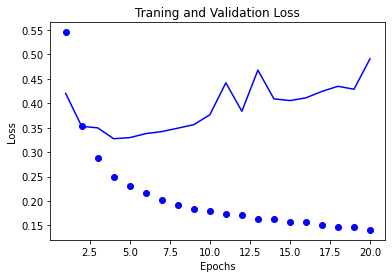

In [ ]:
#plotting the training and validation loss
import matplotlib.pyplot as plt
loss_values = history_1_dict['loss']
val_loss_values = history_1_dict['val_loss']
acc = history_1_dict['binary_accuracy']
val_acc = history_1_dict['val_binary_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Traning and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

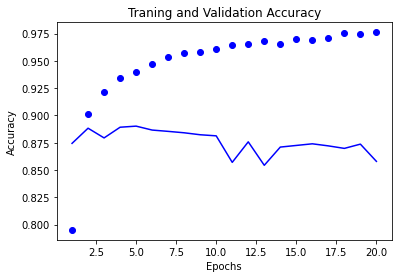

In [ ]:
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Traning and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')